In [1]:
import pyscf
import pyscf.tools
import pyscf.cc
import pyscf.qmmm
from pyscf import lib
from pyscf import gto
from pyscf import df
from pyscf import scf
from pyscf import mcscf
from pyscf import grad
from pyscf.lib import logger
from pyscf.scf import RHF
import pyscf.lib
import numpy as np
import numpy
import matplotlib.pyplot as plt

In [2]:
angstrom=1.889725989

In [6]:
def N2(lval):
    mol = pyscf.gto.M(atom='N 0 0 1.1; N 0 0 0', basis='def2-TZVP', verbose=3) #NN angstrom by default
    deltaZ = np.array((-lval, lval))    # specified in the function call
    #print(mol.atom_coords()) #pyscf convert angstrom input to au 
    mf = pyscf.qmmm.mm_charge(pyscf.scf.RHF(mol), mol.atom_coords(), deltaZ, unit='au') #add qm_mm to RHF(mol)
    class NoSelfQMMM(mf.__class__):   #override class RHF where NN interaction are only due to nuclear charges
        def energy_nuc(self):
            e_nuc=self.mol.energy_nuc()
            e_nuc-=lval**2/np.linalg.norm(self.mol.atom_coords()[0]-self.mol.atom_coords()[1])
            return e_nuc
    
    mf = NoSelfQMMM()
    return mf.kernel()
def N2_only():
    mol = pyscf.gto.M(atom='N 0 0 0; N 0 0 1.1', basis='def2-TZVP')
    mf = pyscf.scf.RHF(mol)
    return mf.kernel()
def CO_only():
    mol = pyscf.gto.M(atom='C 0 0 0; O 0 0 1.1', basis='def2-TZVP')
    mf = pyscf.scf.RHF(mol)
    return mf.kernel()


In [7]:
lvals = np.linspace(-1, 1, 11)
Es = [N2(_) for _ in lvals]

converged SCF energy = -112.693567315542
converged SCF energy = -111.362669607347
converged SCF energy = -110.325031500169
converged SCF energy = -109.582497055293
converged SCF energy = -109.136422746174
converged SCF energy = -108.9876382454
converged SCF energy = -109.136422746174
converged SCF energy = -109.582497055292
converged SCF energy = -110.325031500169
converged SCF energy = -111.362669607347
converged SCF energy = -112.693567315542


converged SCF energy = -108.9876382454
converged SCF energy = -112.787127600436


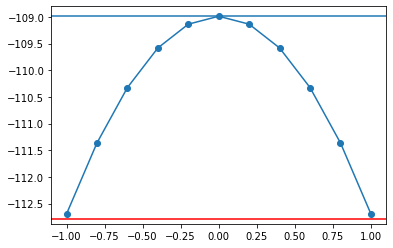

In [8]:
plt.plot(lvals, Es, 'o-')
plt.axhline(N2_only())
plt.axhline(CO_only(), color='red')

In [8]:
help(pyscf.qmmm.mm_charge)
#mol = pyscf.gto.M(atom='N 0 0 1.1; N 0 0 0', basis='def2-TZVP', verbose=3)
#print(pyscf.scf.RHF(mol).energy_nuc())
#print (7*7/1.1/angstrom)

Help on function mm_charge in module pyscf.qmmm.itrf:

mm_charge(scf_method, coords, charges, unit=None)
    Modify the QM method using the (non-relativistic) potential generated
    by MM charges. Note the static Coulomb interactions of the background
    charges are not included in the total energy.
    
    Args:
        scf_method : a HF or DFT object
    
        coords : 2D array, shape (N,3)
            MM particle coordinates
        charges : 1D array
            MM particle charges
    Kwargs:
        unit : str
            Bohr, AU, Ang (case insensitive). Default is the same to mol.unit
    
    Returns:
        Same method object as the input scf_method with modified 1e Hamiltonian
    
    Note:
        1. if MM charge and X2C correction are used together, function mm_charge
        needs to be applied after X2C decoration (.x2c method), eg
        mf = mm_charge(scf.RHF(mol).x2c()), [(0.5,0.6,0.8)], [-0.5]).
        2. Once mm_charge function is applied on the SCF object